In [ ]:
print("Hello Python!")

In [ ]:
print("Lets start working on this project")

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("netflix_titles.csv")

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.director ## To access one column

In [ ]:
df.title

In [ ]:
df['title'].head(5)

In [ ]:
df.title.head(5)

In [ ]:
df['type'].unique()

In [ ]:
df['type'].value_counts()

In [ ]:
type_counts=df['type'].value_counts()

In [ ]:
type_counts.plot(kind='bar')

In [ ]:
type_counts.plot(kind='pie')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
type_counts.plot(kind='bar')
plt.title('Movie vs TV shows on netflix')
plt.xlabel('type')
plt.ylabel('counts')
plt.show()

In [ ]:
##check for missing values
df.isnull().sum()

In [ ]:
df['director'].mode()

In [ ]:
df['director'].mode()[0]

In [ ]:
director_mode=df['director'].mode()[0]

In [ ]:
director_mode

In [ ]:
df['director']=df['director'].fillna(director_mode)

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df['director'].isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df['cast']=df['cast'].fillna('unknown')

In [ ]:
df['cast'].isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df['country']=df['country'].fillna('unknown')

In [ ]:
df['country'].isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
type(df)


In [ ]:
df = pd.read_csv("netflix_titles.csv")

In [ ]:
type(df)

In [ ]:
df.isnull().sum()

In [ ]:
director_mode=df['director'].mode()[0]


In [ ]:
df['director']=df['director'].fillna(director_mode)

In [ ]:
df.isnull().sum()

In [ ]:
df['country']=df['country'].fillna('unknown')

In [ ]:
df.isnull().sum()

In [ ]:
df['cast']=df['cast'].fillna('unknown')

In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna(subset=['date_added'])

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df['date_added'].dtype

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [ ]:
df['date_added'].dtype

In [ ]:
df['date_added']

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['date_added'].dtype

In [ ]:
df['date_added'].dt.year

In [ ]:
df['year_added']=df['date_added'].dt.year

In [ ]:
df.columns

In [ ]:
df['description']

In [ ]:
df['year_added'].dtype

In [ ]:
df['year_added'].isnull().sum()

In [ ]:
df=df.dropna(subset=['year_added'])

In [ ]:
df['year_added'].isnull().sum()

In [ ]:
df['year_added']=df['year_added'].astype(int)

In [ ]:
df['year_added']

In [ ]:
df['year_added'].count()

In [ ]:
df['date_added'].count()

In [ ]:
df['year_added'].dtype

In [ ]:
df.info()

In [ ]:
titles_per_year=df['year_added'].value_counts().sort_index(ascending=False)

In [ ]:
titles_per_year

In [ ]:
titles_per_year=df['year_added'].value_counts().sort_index()

In [ ]:
titles_per_year

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titles_per_year.plot(kind='bar')
plt.title("titles per year")
plt.xlabel("year")
plt.ylabel("no of movies")
plt.show()

In [ ]:
#movies and tv shows for each year
##size() counts how many items for each year
##unstack(fill_value) displays table
movie_tv_shows=(df.groupby(['year_added','type']).size().unstack(fill_value=0))

In [ ]:
movie_tv_shows

In [ ]:
import matplotlib.pyplot as plt
movie_tv_shows.plot(kind='bar',stacked=True,figsize=(6,4))
plt.title("Movies and Tv shows per year")
plt.xlabel("year")
plt.ylabel("no of types")
plt.show()

In [ ]:
df.head()

In [ ]:
df['listed_in'].head()

In [ ]:
genres=df['listed_in'].str.split(',')

In [ ]:
genres

In [ ]:
df.columns

In [ ]:
genres_in_line=genres.explode()

In [ ]:
genres_in_line.head()

In [ ]:
df.head()

In [ ]:
genres_counts=genres_in_line.value_counts()

In [ ]:
genres_counts.head()

In [ ]:
df.columns

In [ ]:
year= int(input("Enter a year: "))

if year>= 2018:
    print("Recent")
else:
    print("old")

In [ ]:
try:
    int(input("enter a year: "))
    print("Valid year")
except:
    print("enter a number")

In [ ]:
df.columns


In [ ]:
def classify_content(year):
    if year>=2018:
        return("Recent")
    else:
        return("old")

In [ ]:
classify_content(2016)

In [ ]:
df['content_times']=df['year_added'].apply(classify_content)


In [ ]:
df[['year_added',"content_times"]].head()

In [ ]:
df.columns

In [ ]:
df['content_times'].value_counts()

In [ ]:
recent_count=0
old_count=0

for value in df['content_times']:
    if value == 'Recent':
        recent_count=recent_count+1
    else:
        old_count=old_count+1

print('recent no of values: ',recent_count)
print('old number of values: ',old_count)

In [ ]:
def content_types(year,cutoff=2020):
    if year >= cutoff:
        return("recent")
    else:
        return("old")
        

In [ ]:
content_types(2018,cutoff=2017)


In [ ]:
df['content_types']=df['year_added'].apply(content_types)

In [ ]:
df[['content_types','year_added']].head()

In [ ]:
df.columns


In [ ]:
content_lambda=lambda year: 'Recent' if year>=2018 else 'old'

In [ ]:
content_lambda(2020)

In [ ]:
df['content_lambda']= df['year_added'].apply(content_lambda)

In [ ]:
df.columns

In [ ]:
df['content_map']=list(map(lambda y : "Recent" if y>=2018 else "old",df['year_added']))

In [ ]:
df[['year_added', 'content_map']]

In [ ]:
df.columns

In [ ]:
recent_count=0
old_count=0
i=0

values=list(df['content_lambda'])
while i<len(values):
    if values[i] == 'Recent':
        recent_count=recent_count+1
    else:
        old_count=old_count+1
    i=i+1

print("recent_count is : ", recent_count)
print("old_count is : ", old_count)
print(len(values))

In [ ]:
class student:
    def __init__(self,name):
        self.name=name
    def sayhello(self):
        return("Hello " + self.name)

p=student("Sruthi")
p.sayhello()
        

In [ ]:
class netflixanalyzer:
    def __init__(self,df):
        self.df=df
        
analyzer=netflixanalyzer(df)

In [ ]:
analyzer.df.head()

In [ ]:
df.columns

In [ ]:
class netflixanalyzer:
    def __init__(self,df):
        self.df=df
    def classify_content(self):
        self.df['classify_content']=self.df['year_added'].apply(lambda y: "Recent" if y>=2018 else "old")
        return(self.df[['classify_content', 'year_added']].head())

In [ ]:
analyzer = netflixanalyzer(df)

In [ ]:
df.columns

In [ ]:
analyzer.classify_content()

In [ ]:
class netflixanalyzer:
    def __init__(self,df):
        self.df=df
        

In [ ]:
analyzer=netflixanalyzer(df)

In [ ]:
analyzer.df.head()

In [ ]:
df.columns

In [ ]:
class netflixanalyzer:
    def __init__(self,df):
        self.df=df
    def column_names(self):
        return self.df.columns
    def classify_content(self):
        self.df['classified_content']=self.df['year_added'].apply(lambda y: "recent" if y>2018 else "old")
        return self.df[['classified_content','year_added']].head()

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.column_names()

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.classify_content()

In [ ]:
df.columns

In [ ]:
class netflixanalyzer:
    def __init__(self,df):
        self.df=df
    def column_names(self):
        return self.df.columns
    def classify_content(self):
        self.df['classified_content']=self.df['year_added'].apply(lambda y: "recent" if y>2018 else "old")
        return self.df[['classified_content','year_added']].head()
    def count_recent_old(self):
        recent_count=(self.df['year_added']>2018).sum()
        old_count=(self.df['year_added']<=2018).sum()
        return recent_count,old_count
        

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.count_recent_old()

In [ ]:
df.columns


In [ ]:
df['content_times'].value_counts()


In [ ]:
analyzer=netflixanalyzer(df)
analyzer.column_names()

In [ ]:
len(df)

In [ ]:
class netflixanalyzer():
    def __init__(self,df):
        self.df=df
    def content_times(self):
        self.df['new_content_times']=self.df['year_added'].apply(lambda y: 'recent' if y>2018 else 'old')
        return self.df[['new_content_times','year_added']]
    def duration_of_movie(self):
        self.df['movie_duration']='duration'
        return self.df['duration']
    def with_number(self,n=10):
        return self.df.head(n)

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.content_times()


In [ ]:
analyzer=netflixanalyzer(df)
analyzer.duration_of_movie()


In [ ]:
analyzer.with_number()

In [ ]:
analyzer.with_number(10)

In [ ]:
class netflixanalyzer():
    def __init__(self,df):
        self.df=df
    def summary(self):
        return {'total_rows':len(self.df),'total columns': len(self.df.columns), 'column_names':list(self.df.columns)}
        

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.summary()

In [ ]:
class netflixanalyzer():
    def __init__(self,df):
        self.df=df
    def filter_by_type(self,content_type):
        return self.df['type']== content_type

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.filter_by_type('Movie')

In [ ]:
class netflixanalyzer():
    def __init__(self,df):
        self.df=df
    def filter_by_type(self,content_type):
        return self.df[self.df['type']== content_type]

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.filter_by_type('Movie')

In [ ]:
class netflixanalyzer():
    def __init__(self,df):
        self.df=df
    def filter_by_type(self,content_type,year):
        return self.df[(self.df['type']== content_type) & (self.df['year_added'] > year)]

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.filter_by_type('Movie',2019)

In [ ]:
class netflixanalyzer():
    def __init__(self,df):
        self.df=df
    def count_by_type(self):
        return self.df['type'].value_counts()          

In [ ]:
analyzer=netflixanalyzer(df)
analyzer.count_by_type()

In [ ]:
df.columns

In [ ]:
df['date_added']

In [10]:
df=pd.read_csv("netflix_titles.csv")

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [13]:
print("hello team,upload to git is done successfully")

hello team,upload to git is done successfully


In [14]:
print("work is done properly")

work is done properly


In [15]:
try:
    x=int('abc')
except ValueError:
    print("cannot convert text into a number")

cannot convert text into a number


In [16]:
try:
    x=int(123)
except ValueError:
    print("number is not in right format")
else:
    print("value is correct")
finally:
    print("code is executed")

value is correct
code is executed


In [18]:
import pandas as pd
try:
    df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
    print("successful")
except Exception as e:
    print("not successful")
    print(e)

successful


In [19]:
with open("test_file.txt","w") as file:
    file.write("This is first test file example")

In [20]:
with open("test_file.txt","r") as file:
    content=file.read()
    print(content)

This is first test file example


In [22]:
total_titles=len(df)
print(total_titles)

8807


In [28]:
movies_count=(df['type']=='Movie').sum()
print(movies_count)

6131


In [29]:
df['type']

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [31]:
Tv_show=(df['type']=='TV Show').sum()
print(Tv_show)

2676


In [50]:
total_titles=len(df)
movies_count=(df['type']=='Movie').sum()
Tv_show=(df['type']=='TV Show').sum()
with open("test_file.txt","w") as file:
    file.write(f"total_titles: {total_titles}\n")
    file.write(f"movies_count: {movies_count}\n")
    file.write(f"Tv_show:{Tv_show}\n")


In [51]:
with open("test_file.txt","r") as file:
    content=file.read()
    print(content)

total_titles: 8807
movies_count: 6131
Tv_show:2676



In [52]:
with open("test_file.txt","a") as file:
    file.write(f"writing into the file is done")

In [53]:
with open("test_file.txt","r") as file:
    content=file.read()
    print(content)

total_titles: 8807
movies_count: 6131
Tv_show:2676
writing into the file is done


In [59]:
from netflix_utils import count_movies,count_TVshow
print(count_movies(df),count_TVshow(df))

6131 2676


In [60]:
import netflix_utils
movies=netflix_utils.count_movies(df)
Tv_shows=netflix_utils.count_TVshow(df)
print(movies)
print(Tv_shows)

6131
2676


In [67]:
import importlib
import netflix_utils
importlib.reload(netflix_utils)


<module 'netflix_utils' from '/Users/sruthikondapalli/Netflix_Python_Project/netflix_utils.py'>

In [68]:
netflix_utils.count_movies?



Signature: netflix_utils.count_movies(df)
Docstring:
Counts how many movies are present in the Netflix dataset.

Parameters:
df (pandas.DataFrame): Netflix dataset

Returns:
int: Number of movies
File:      ~/Netflix_Python_Project/netflix_utils.py
Type:      function

In [73]:
from functools import reduce
num=[1,2,3,4]
total_sum=(reduce(lambda x,y:x+y,num))
print(total_sum)

10


In [76]:
from functools import reduce
num=[1,2,3,4]
total_sum=list((map(lambda x:x+x,num)))
print(total_sum)

[2, 4, 6, 8]


In [77]:
from functools import reduce
num=[1,2,3,4]
total_sum=list((filter(lambda x:x>2,num)))
print(total_sum)

[3, 4]


In [84]:
def netflix_titles(df):
    for title in df['title']:
        yield title

title_gen=netflix_titles(df)
print(next(title_gen))
print(next(title_gen))

Dick Johnson Is Dead
Blood & Water


In [85]:
def greet():
    print("Hi")

In [87]:
greet()

Hi


In [88]:
def wrapper(func):
    def inside_func():
        print("before wrapper")
        func()
        print("after wrapper")
    return inside_func

In [89]:
greeting=wrapper(greet)

In [92]:
greeting()

before wrapper
Hi
after wrapper


In [95]:
for i in range(1,4):
    for j in range(1,3):
        print(i,j)

1 1
1 2
2 1
2 2
3 1
3 2


In [107]:
for i in range(1,5):
    for j in range(i):
        print("*",end="")
    print()

*
**
***
****


In [108]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [126]:
years=df['release_year'].unique()
types=df['type'].unique()
for year in years[:3]:
    print("Year:",year)
    for t in types:
        count= ((df['release_year']==year) & (df['type']==t))
        print(t,count.sum())


Year: 2020
Movie 517
TV Show 436
Year: 2021
Movie 277
TV Show 315
Year: 1993
Movie 24
TV Show 4


In [112]:
print(year)

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


In [128]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt


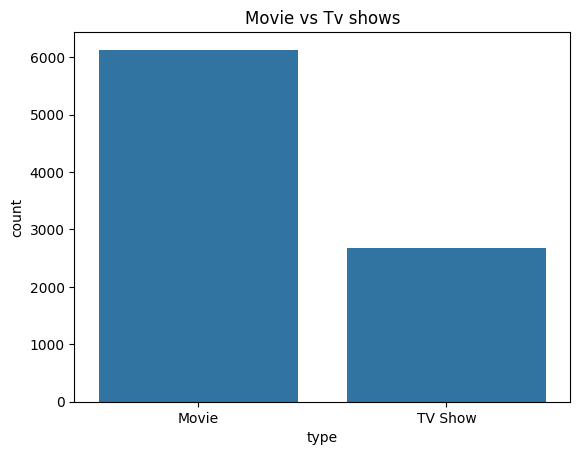

In [131]:
sns.countplot(x='type',data=df)
plt.title("Movie vs Tv shows")
plt.show()

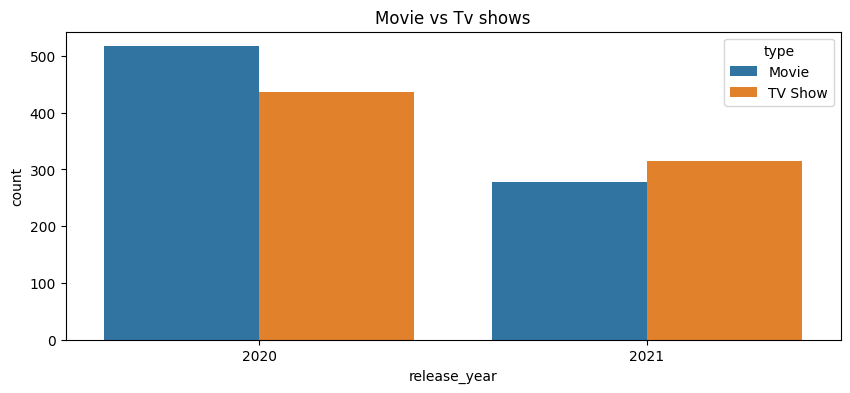

In [143]:
recent=df[df['release_year']>2019]
plt.figure(figsize=(10,4))
sns.countplot(x='release_year',hue='type',data=recent)
plt.title("Movie vs Tv shows")
plt.show()

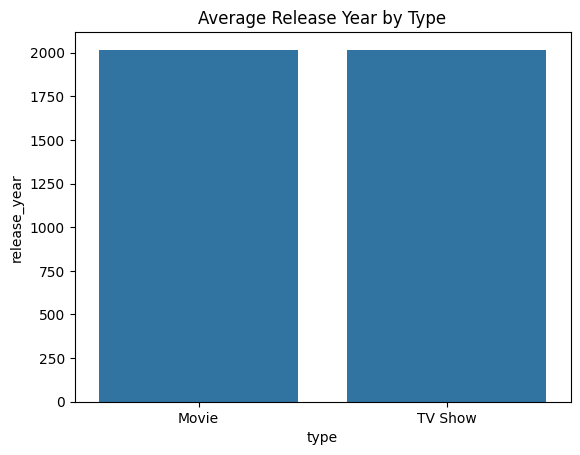

In [142]:
sns.barplot(x='type', y='release_year', data=df)
plt.title("Average Release Year by Type")
plt.show()


In [144]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [145]:
df['release_year'].describe()


count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [146]:
df.groupby('type')['release_year'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Movie,6131.0,2013.121514,9.678169,1942.0,2012.0,2016.0,2018.0,2021.0
TV Show,2676.0,2016.605755,5.740138,1925.0,2016.0,2018.0,2020.0,2021.0
